In [1]:
import pandas as pd
import numpy as np
import os
import math
import scipy
import matplotlib.pyplot as plt
from Dipper_Project_Functions import plotparams
from Dipper_Project_Functions import read_lightcurve_csv
from Dipper_Project_Functions import read_lightcurve_dat
from Dipper_Project_Functions import custom_id
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.timeseries import LombScargle as ls
import heapq

In [2]:
asassn_id = 68720274411		
ra_val = 13.652625
dec_val = 64.72975

In [3]:
colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']

In [4]:
#dfv, dfg = read_lightcurve_dat(asassn_id, 'Research/Updated_LC_Data')

dfv, dfg = read_lightcurve_csv(asassn_id, ra_val, dec_val, 'Research/Updated_LC_Data')

dfv = dfv.loc[dfv.Mag < 20].reset_index(drop=True)
dfg = dfg.loc[dfg.Mag < 20].reset_index(drop=True)

In [5]:
c = SkyCoord(ra=ra_val*u.degree, dec=dec_val*u.degree, frame='icrs')
print(c.ra.hms)
print(c.dec.dms)

hms_tuple(h=0.0, m=54.0, s=36.630000000000535)
dms_tuple(d=64.0, m=43.0, s=47.09999999998445)


In [6]:
print(np.mean(dfg.Mag))
print(np.mean(dfv.Mag))

13.47834861878453
12.786575146935348


In [7]:
mag = dfg['Mag']

jd = dfg['JD']

meanmag = sum(mag) / len(mag)

dfg_mag_avg = [i - meanmag for i in mag]

peaks = scipy.signal.find_peaks(dfg_mag_avg, prominence=0.17, distance=25, height=0.3, width=2) 

#peaks = scipy.signal.find_peaks(dfg_mag_avg, prominence=0.17, distance=25, height=0.3, width=1.7)

peak = peaks[0]

prop = peaks[1]

length = len(peak)

peak = [int(i) for i in peak]

peak = pd.Series(peak)

Number of peaks: 5


Text(0, 0.5, 'Mag')

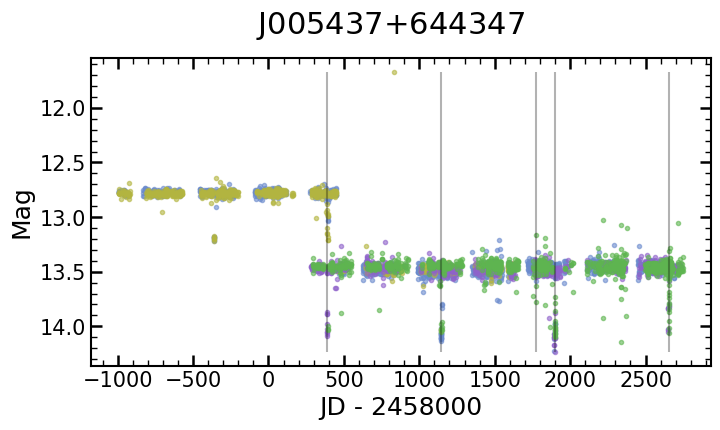

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)
fig.suptitle(custom_id(ra_val,dec_val), fontsize=22, y=1)

cams = dfg["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)

print('Number of peaks:', length)

for i in range(0,camnum):
    camdf = dfg.loc[dfg["Camera"] == camtype[i]].reset_index(drop=True)
    camjd = camdf["HJD"].astype(float) - (2.458 * 10 ** 6)
    cammag = camdf["mag"].astype(float)
    ax.scatter(camjd, cammag, color=colors[i], alpha=0.6, marker='.')

cams2 = dfv["Camera"]
camtype2 = np.unique(cams2)
camnum2 = len(camtype2)

for i in range(0,camnum2):
    camdf2 = dfv.loc[dfv["Camera"] == camtype2[i]].reset_index(drop=True)
    camjd2 = camdf2["HJD"].astype(float) - (2.458 * 10 ** 6)
    cammag2 = camdf2["mag"].astype(float)
    ax.scatter(camjd2, cammag2, color=colors[i], alpha=0.6, marker='.')

for i in range(len(peak)):
    ax.vlines((jd[peak[i]] - (2.458 * 10**6)), min(dfg.Mag), max(dfg.Mag), "k", alpha=0.3)

ax.invert_yaxis()
ax.set_xlabel('JD - 2458000', fontsize=18)
ax.set_ylabel('Mag', fontsize=18)

Number of peaks: 5


Text(0, 0.5, 'Mag')

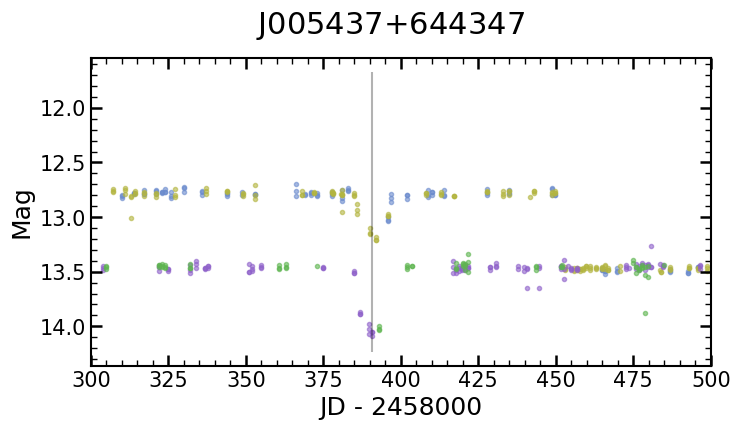

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)
fig.suptitle(custom_id(ra_val,dec_val), fontsize=22, y=1)

cams = dfg["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)

print('Number of peaks:', length)

for i in range(0,camnum):
    camdf = dfg.loc[dfg["Camera"] == camtype[i]].reset_index(drop=True)
    camjd = camdf["HJD"].astype(float) - (2.458 * 10 ** 6)
    cammag = camdf["mag"].astype(float)
    ax.scatter(camjd, cammag, color=colors[i], alpha=0.6, marker='.')

cams2 = dfv["Camera"]
camtype2 = np.unique(cams2)
camnum2 = len(camtype2)

for i in range(0,camnum2):
    camdf2 = dfv.loc[dfv["Camera"] == camtype2[i]].reset_index(drop=True)
    camjd2 = camdf2["HJD"].astype(float) - (2.458 * 10 ** 6)
    cammag2 = camdf2["mag"].astype(float)
    ax.scatter(camjd2, cammag2, color=colors[i], alpha=0.6, marker='.')

for i in range(len(peak)):
    ax.vlines((jd[peak[i]] - (2.458 * 10**6)), min(dfg.Mag), max(dfg.Mag), "k", alpha=0.3)

ax.invert_yaxis()
ax.set_xlim(300,500)
ax.set_xlabel('JD - 2458000', fontsize=18)
ax.set_ylabel('Mag', fontsize=18)

In [10]:
first_time = Time(dfv['JD'][0], format='jd')
first_time.format = 'iso'
print('The time of the first point:', first_time)

last_time = Time(dfg['JD'][(len(dfg['JD'])-1)], format='jd')
last_time.format = 'iso'
print('The time of the last point:', last_time)

The time of the first point: 2014-12-17 06:28:04.800
The time of the last point: 2025-03-11 02:09:04.896


In [11]:
dfg_dip = dfg.loc[dfg["JD"] > (1600 + 2.458 * 10**6)].reset_index(drop=True)
dfg_dip = dfg_dip.loc[dfg_dip["JD"] < (1700 + 2.458 * 10**6)].reset_index(drop=True)

dfg_nodip = dfg.loc[dfg["JD"] > (500 + 2.458 * 10**6)].reset_index(drop=True)
dfg_nodip = dfg_nodip.loc[dfg_nodip["JD"] < (1500 + 2.458 * 10**6)].reset_index(drop=True)

In [12]:
meannodip = np.mean(dfg_nodip['Mag'])
stdnodip = np.std(dfg_nodip['Mag'])

deep = max(dfg_dip['Mag'])

print('The mean of the LC w/out the dip:', meannodip)
print('The std of the LC w/out the dip:',stdnodip)
print('The deepest point of the dip:', deep)

dfg_deepest = dfg.loc[dfg['Mag'] == deep].reset_index(drop=True)
deep_time = Time(dfg_deepest['JD'][0], format='jd')
deep_time.format = 'iso'

print('The time of the deepest point:', deep_time, dfg_deepest['JD'][0])

depth = deep - meannodip

print('Dip depth:', depth)

The mean of the LC w/out the dip: 13.479411985018725
The std of the LC w/out the dip: 0.09844834919568536
The deepest point of the dip: 13.686
The time of the deepest point: 2022-03-04 02:35:48.480 2459642.6082
Dip depth: 0.20658801498127488


2022-03-04 02:35:48.480
2022-03-04 02:35:48.480


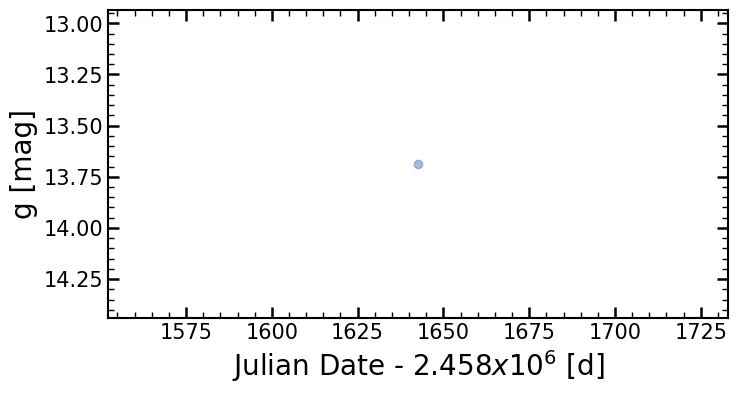

In [13]:
dfg_time = dfg_dip.loc[dfg_dip['Mag'] >= (meannodip + 2*stdnodip)].reset_index(drop=True)

t1 = dfg_time['JD'][0]
t2 = dfg_time['JD'][len(dfg_time['HJD'])-1]

time1 = Time(t1, format='jd')
time1.format = 'iso'

time2 = Time(t2, format='jd')
time2.format = 'iso'

print(time1)
print(time2)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)

cams = dfg_time["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)

colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']
    
camdf = pd.DataFrame()

for i in range(0,camnum):
    camdf = dfg_time.loc[dfg_time["Camera"] == camtype[i]].reset_index(drop=True)
    for j in range(0,len(camdf)):
        camjd = [float(i) for i in camdf["JD"]]
        cammag = [float(i) for i in camdf['Mag']]
        ax.scatter((camjd[j] - (2.458 * 10 **6)), cammag[j], color = colors[i], alpha = 0.6)

ax.invert_yaxis() 
ax.set_xlabel('Julian Date - $2.458x10^{6}$ [d]', fontsize=20)
ax.set_ylabel('g [mag]', fontsize=20)
plt.show() 

In [14]:
print(t1)
print(t2)

2459642.6082
2459642.6082


In [15]:
print(t2-t1)

0.0


45251


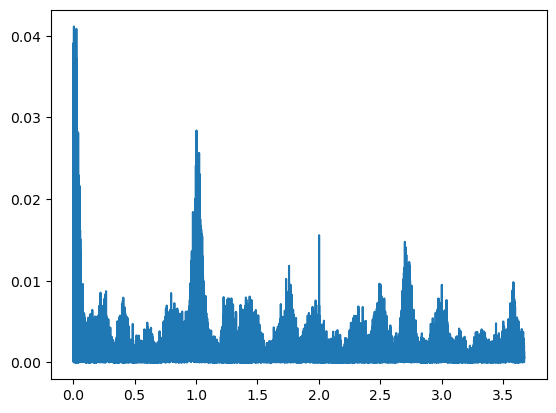

In [16]:
freq, power = ls(dfg["JD"], dfg["Mag"]).autopower()

print(len(freq))
plt.plot(freq, power)

In [17]:
index_nums = heapq.nlargest(10,power)
j = freq[np.where(power == index_nums[0])]
t =  (1 / j) *2
print('frequency:',j)
print('period:', t)


dfg["OrbNum"] = dfg["JD"] / t
dfg["Phase"] = dfg["OrbNum"] % 1
dfg.head(10)

frequency: [0.00531729]
period: [376.1313084]


,HJD,UT Date,Camera,FWHM,Limit,mag,mag_err,flux(mJy),flux_err,Filter,Mag,JD,OrbNum,Phase
0,2.458282e+06,2018-06-12.4325615,bq,1.59,16.178,13.456,0.018,15.049,0.248,g,13.456,2.458282e+06,6535.701428,0.701428
1,2.458282e+06,2018-06-12.4337788,bq,1.53,16.191,13.452,0.018,15.095,0.246,g,13.452,2.458282e+06,6535.701432,0.701432
2,2.458282e+06,2018-06-12.4350121,bq,1.57,16.169,13.456,0.018,15.060,0.251,g,13.456,2.458282e+06,6535.701435,0.701435
3,2.458289e+06,2018-06-19.4232260,bq,1.49,16.262,13.450,0.016,15.136,0.231,g,13.450,2.458289e+06,6535.720015,0.720015
4,2.458289e+06,2018-06-19.4244542,bq,1.56,16.275,13.436,0.016,15.323,0.228,g,13.436,2.458289e+06,6535.720018,0.720018
5,2.458289e+06,2018-06-19.4256706,bq,1.51,16.360,13.479,0.015,14.749,0.211,g,13.479,2.458289e+06,6535.720021,0.720021
6,2.458291e+06,2018-06-21.4533905,bq,1.50,15.684,13.481,0.029,14.703,0.390,g,13.481,2.458291e+06,6535.725412,0.725412
7,2.458291e+06,2018-06-21.4546060,bq,1.51,15.578,13.463,0.031,14.955,0.428,g,13.463,2.458291e+06,6535.725416,0.725416
8,2.458297e+06,2018-06-27.4391100,br,1.54,16.007,13.448,0.021,15.157,0.290,g,13.448,2.458297e+06,6535.741327,0.741327
9,2.458297e+06,2018-06-27.4403298,br,1.47,15.905,13.433,0.022,15.365,0.319,g,13.433,2.458297e+06,6535.741330,0.741330


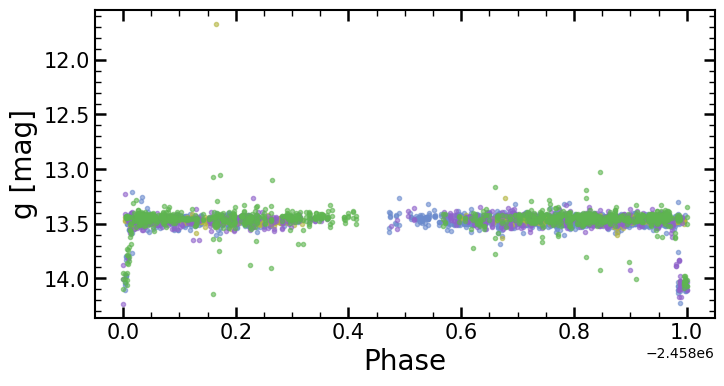

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)

cams = dfg["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)
    
camdf = pd.DataFrame()

for i in range(0,camnum):
    camdf = dfg.loc[dfg["Camera"] == camtype[i]].reset_index(drop=True)
    for j in range(0,len(camdf)):
        camjd = [float(i) for i in camdf["Phase"]]
        cammag = [float(i) for i in camdf['Mag']]
        ax.scatter((camjd[j] - (2.458 * 10 **6)), cammag[j], marker='.', color = colors[i], alpha = 0.6)

ax.invert_yaxis() 
ax.set_xlabel('Phase', fontsize=20)
ax.set_ylabel('g [mag]', fontsize=20)
plt.show()